In [81]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

In [82]:
mobile_modelling = pd.read_csv('../Data/Data_modelling/mobile_modelling.csv')

X = mobile_modelling.iloc[:, 0:-1]
y = mobile_modelling.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

mobile_df = pd.concat([X_train, y_train], axis=1)

print(mobile_df.shape)

X_train = mobile_df.iloc[:, 0:-1]
y_train = mobile_df.iloc[:, -1]



(980, 21)


In [129]:
mobile_df = mobile_df[mobile_df['px_height'] != 0]

mobile_df['mean_sc_w'] = mobile_df.groupby('sc_h')['sc_w'].transform('mean')
mobile_df['sc_w'] = np.where(mobile_df['sc_w'] == 0, mobile_df['mean_sc_w'], mobile_df['sc_w'])


## sprobowac z mean i bez mean i z usunieciem wierszy !!!!!

In [115]:
# more than 0.02
columns_to_drop_1 = ['touch_screen', 'blue', 'dual_sim', 'four_g', 'wifi', 'three_g']
X_train_1 = X_train.drop(columns=columns_to_drop_1)
X_val_1 = X_val.drop(columns=columns_to_drop_1)

# more than 0.05
columns_to_drop_2 = ['touch_screen', 'blue', 'dual_sim', 'four_g', 'wifi', 'three_g', 'fc', 'n_cores', 'm_dep', 'sc_h', 'clock_speed', 'sc_w', 'pc', 'talk_time', 'int_memory', 'mobile_wt']
X_train_2 = X_train.drop(columns=columns_to_drop_2)
X_val_2 = X_val.drop(columns=columns_to_drop_2)

# just RAM
X_train_3 = X_train['ram']
X_val_3 = X_val['ram']

# from int memory up
columns_to_drop_4 = ['touch_screen', 'blue', 'dual_sim', 'four_g', 'wifi', 'three_g', 'fc', 'n_cores', 'm_dep', 'sc_h', 'clock_speed', 'sc_w', 'pc', 'talk_time']
X_train_4 = X_train.drop(columns=columns_to_drop_4)
X_val_4 = X_val.drop(columns=columns_to_drop_4)


# dummy

In [84]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# IMO DO WYWALENIA BO TO ZASMIECA TYLKO KOD A ACCURACY JEST SMIECHU WARTE

dc = DummyClassifier(strategy='uniform')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_val)
print('most_frequent:')
print(classification_report(y_val, y_pred))

dc = DummyClassifier(strategy='stratified')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_val)
print('stratified:')
print(classification_report(y_val, y_pred))

most_frequent:
              precision    recall  f1-score   support

           0       0.17      0.18      0.17        73
           1       0.29      0.30      0.29        74
           2       0.20      0.21      0.20        73
           3       0.19      0.18      0.18        74

    accuracy                           0.21       294
   macro avg       0.21      0.21      0.21       294
weighted avg       0.21      0.21      0.21       294

stratified:
              precision    recall  f1-score   support

           0       0.20      0.16      0.18        73
           1       0.30      0.28      0.29        74
           2       0.25      0.25      0.25        73
           3       0.26      0.32      0.29        74

    accuracy                           0.26       294
   macro avg       0.25      0.25      0.25       294
weighted avg       0.25      0.26      0.25       294



# logistic regression

In [85]:
# Create one-vs-rest logistic regression instance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class="ovr")

# Train the model
model.fit(X_train, y_train)
y_pred = dc.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.26      0.25        73
           1       0.29      0.24      0.26        74
           2       0.28      0.32      0.29        73
           3       0.25      0.24      0.25        74

    accuracy                           0.27       294
   macro avg       0.27      0.27      0.26       294
weighted avg       0.27      0.27      0.26       294



In [86]:
model = LogisticRegression(multi_class="ovr")

# Train the model
model.fit(X_train_1, y_train)
y_pred_1 = dc.predict(X_val_1)

print(classification_report(y_val, y_pred_1))

              precision    recall  f1-score   support

           0       0.24      0.27      0.25        73
           1       0.17      0.16      0.17        74
           2       0.26      0.26      0.26        73
           3       0.22      0.20      0.21        74

    accuracy                           0.22       294
   macro avg       0.22      0.22      0.22       294
weighted avg       0.22      0.22      0.22       294



In [87]:
model = LogisticRegression(multi_class="ovr")

# Train the model
model.fit(X_train_2, y_train)
y_pred_2 = dc.predict(X_val_2)

print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.28      0.26      0.27        73
           1       0.34      0.31      0.33        74
           2       0.24      0.26      0.25        73
           3       0.28      0.30      0.29        74

    accuracy                           0.28       294
   macro avg       0.28      0.28      0.28       294
weighted avg       0.28      0.28      0.28       294



In [88]:
model = LogisticRegression(multi_class="ovr")

# Train the model
model.fit( X_train_3.values.reshape(-1, 1), y_train)
y_pred_3 = dc.predict(X_val_3)

print(classification_report(y_val, y_pred_3))

              precision    recall  f1-score   support

           0       0.29      0.27      0.28        73
           1       0.24      0.23      0.23        74
           2       0.18      0.18      0.18        73
           3       0.25      0.28      0.27        74

    accuracy                           0.24       294
   macro avg       0.24      0.24      0.24       294
weighted avg       0.24      0.24      0.24       294



# decision tree

In [89]:
# all
from sklearn.tree import DecisionTreeClassifier,plot_tree #export_graphviz

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred = tree.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.91        73
           1       0.73      0.80      0.76        74
           2       0.73      0.73      0.73        73
           3       0.89      0.88      0.88        74

    accuracy                           0.82       294
   macro avg       0.83      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



In [90]:
# over 0.02
tree = DecisionTreeClassifier()
tree.fit(X_train_1,y_train)
y_pred_1= tree.predict(X_val_1)
print(classification_report(y_val, y_pred_1))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        73
           1       0.69      0.78      0.73        74
           2       0.71      0.71      0.71        73
           3       0.89      0.85      0.87        74

    accuracy                           0.80       294
   macro avg       0.81      0.80      0.80       294
weighted avg       0.81      0.80      0.80       294



In [91]:
# over 0.05
tree = DecisionTreeClassifier()
tree.fit(X_train_2,y_train)
y_pred_2= tree.predict(X_val_2)
print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        73
           1       0.80      0.86      0.83        74
           2       0.77      0.78      0.78        73
           3       0.90      0.88      0.89        74

    accuracy                           0.86       294
   macro avg       0.86      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294



In [92]:
# from int_memory
tree = DecisionTreeClassifier()
tree.fit(X_train_4,y_train)
y_pred_4= tree.predict(X_val_4)
print(classification_report(y_val, y_pred_4))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.81      0.78      0.79        74
           2       0.75      0.82      0.78        73
           3       0.93      0.88      0.90        74

    accuracy                           0.85       294
   macro avg       0.85      0.85      0.85       294
weighted avg       0.85      0.85      0.85       294



In [93]:
# just ram
# over 0.02
tree = DecisionTreeClassifier()
tree.fit(X_train_3.values.reshape(-1, 1), y_train)
y_pred_3= tree.predict(X_val_3.values.reshape(-1, 1))
print(classification_report(y_val, y_pred_3))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        73
           1       0.60      0.64      0.62        74
           2       0.52      0.49      0.51        73
           3       0.74      0.70      0.72        74

    accuracy                           0.66       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.66      0.66      0.66       294



# SVM

In [127]:
from sklearn.svm import SVC
svm = SVC()

# all
svm.fit(X_train,y_train)
y_pred = svm.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.89      0.95      0.92        74
           2       0.94      0.88      0.91        73
           3       0.96      0.99      0.97        74

    accuracy                           0.94       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.94      0.94      0.94       294



In [126]:
# over 0.02
svm.fit(X_train_1,y_train)
y_pred = svm.predict(X_val_1)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.89      0.95      0.92        74
           2       0.94      0.88      0.91        73
           3       0.96      0.99      0.97        74

    accuracy                           0.94       294
   macro avg       0.94      0.94      0.94       294
weighted avg       0.94      0.94      0.94       294



In [125]:
# over 0.05
svm.fit(X_train_2,y_train)
y_pred = svm.predict(X_val_2)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        73
           1       0.94      0.97      0.95        74
           2       0.94      0.92      0.93        73
           3       0.96      0.97      0.97        74

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.96      0.96      0.96       294



In [124]:
# from int_memory
svm.fit(X_train_4,y_train)
y_pred_4 = svm.predict(X_val_4)
print(classification_report(y_val, y_pred_4))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        73
           1       0.91      0.96      0.93        74
           2       0.94      0.90      0.92        73
           3       0.96      0.97      0.97        74

    accuracy                           0.95       294
   macro avg       0.95      0.95      0.95       294
weighted avg       0.95      0.95      0.95       294



In [123]:
# just ram
svm.fit(X_train_3.values.reshape(-1, 1),y_train)
y_pred = svm.predict(X_val_3.values.reshape(-1, 1))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        73
           1       0.63      0.73      0.68        74
           2       0.61      0.63      0.62        73
           3       0.86      0.80      0.83        74

    accuracy                           0.74       294
   macro avg       0.75      0.74      0.74       294
weighted avg       0.75      0.74      0.74       294



# Random Forrest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier
# all
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.81      0.80      0.80        74
           2       0.75      0.77      0.76        73
           3       0.93      0.89      0.91        74

    accuracy                           0.86       294
   macro avg       0.86      0.86      0.86       294
weighted avg       0.86      0.86      0.86       294



In [121]:
# over 0.02
model = RandomForestClassifier(random_state=42)
model.fit(X_train_1,y_train)
y_pred_1 = model.predict(X_val_1)
print(classification_report(y_val, y_pred_1))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        73
           1       0.78      0.77      0.78        74
           2       0.72      0.73      0.72        73
           3       0.89      0.85      0.87        74

    accuracy                           0.82       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



In [120]:
# over 0.05
model = RandomForestClassifier(random_state=42)
model.fit(X_train_2,y_train)
y_pred_2 = model.predict(X_val_2)
print(classification_report(y_val, y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        73
           1       0.85      0.92      0.88        74
           2       0.81      0.85      0.83        73
           3       0.95      0.85      0.90        74

    accuracy                           0.89       294
   macro avg       0.90      0.89      0.89       294
weighted avg       0.90      0.89      0.89       294



In [131]:
# from int_memory
model = RandomForestClassifier(random_state=42)
model.fit(X_train_4,y_train)
y_pred_4 = model.predict(X_val_4)
print(classification_report(y_val, y_pred_4))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.85      0.86      0.86        74
           2       0.82      0.89      0.86        73
           3       0.97      0.91      0.94        74

    accuracy                           0.90       294
   macro avg       0.90      0.90      0.90       294
weighted avg       0.90      0.90      0.90       294



      px_height  px_width
1275        262      1587
872        1262      1520
1321       1088      1718
64          194      1437
1070        104       541
...         ...       ...
32          379       932
882         619       867
378         491      1506
8           192       757
934         671      1445

[980 rows x 2 columns]


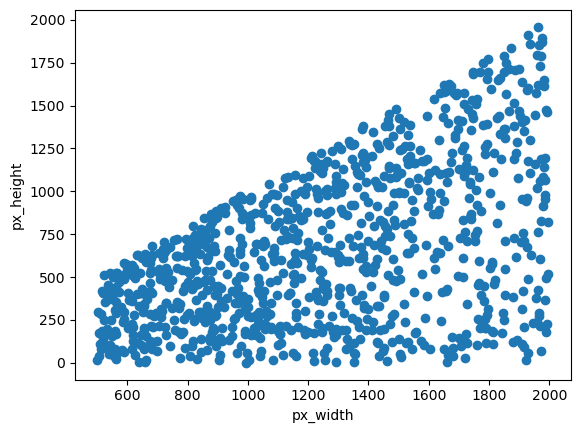

In [103]:
unique_pairs = mobile_df[['px_height', 'px_width']].drop_duplicates()

# Wyświetl unikatowe pary
print(unique_pairs)

plt.scatter(mobile_df['px_width'], mobile_df['px_height'])
plt.xlabel('px_width')
plt.ylabel('px_height')
plt.show()